<a href="https://colab.research.google.com/github/20Engma/sehab-APP/blob/main/sehab2CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os


In [48]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 253 files belonging to 3 classes.


In [51]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 76 files belonging to 3 classes.


In [52]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 35 files belonging to 3 classes.


In [53]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 7)

Epoch 1/7
3/3 [==============================] - 69s 19s/step - loss: 10.8456 - accuracy: 0.3992 - val_loss: 55.7328 - val_accuracy: 0.3421
Epoch 2/7
3/3 [==============================] - 47s 15s/step - loss: 3.4627 - accuracy: 0.4032 - val_loss: 1.5475 - val_accuracy: 0.5000
Epoch 3/7
3/3 [==============================] - 47s 15s/step - loss: 0.8944 - accuracy: 0.6047 - val_loss: 3.2143 - val_accuracy: 0.4868
Epoch 4/7
3/3 [==============================] - 47s 15s/step - loss: 0.8246 - accuracy: 0.6403 - val_loss: 2.4863 - val_accuracy: 0.5132
Epoch 5/7
3/3 [==============================] - 45s 14s/step - loss: 0.6808 - accuracy: 0.7470 - val_loss: 2.7342 - val_accuracy: 0.5000
Epoch 6/7
3/3 [==============================] - 47s 15s/step - loss: 0.5287 - accuracy: 0.8103 - val_loss: 2.2879 - val_accuracy: 0.4342
Epoch 7/7
3/3 [==============================] - 46s 15s/step - loss: 0.4619 - accuracy: 0.8458 - val_loss: 2.4234 - val_accuracy: 0.5395


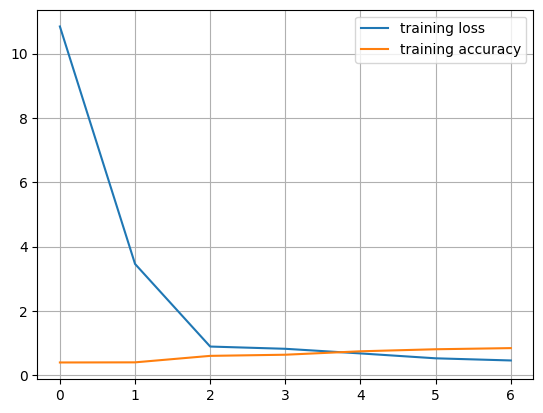

In [56]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

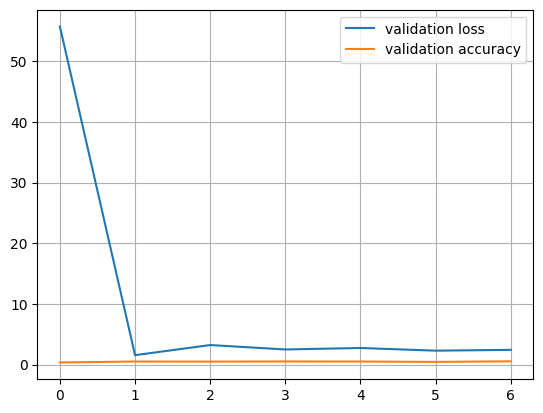

In [57]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

2/2 [==============================] - 2s 201ms/step


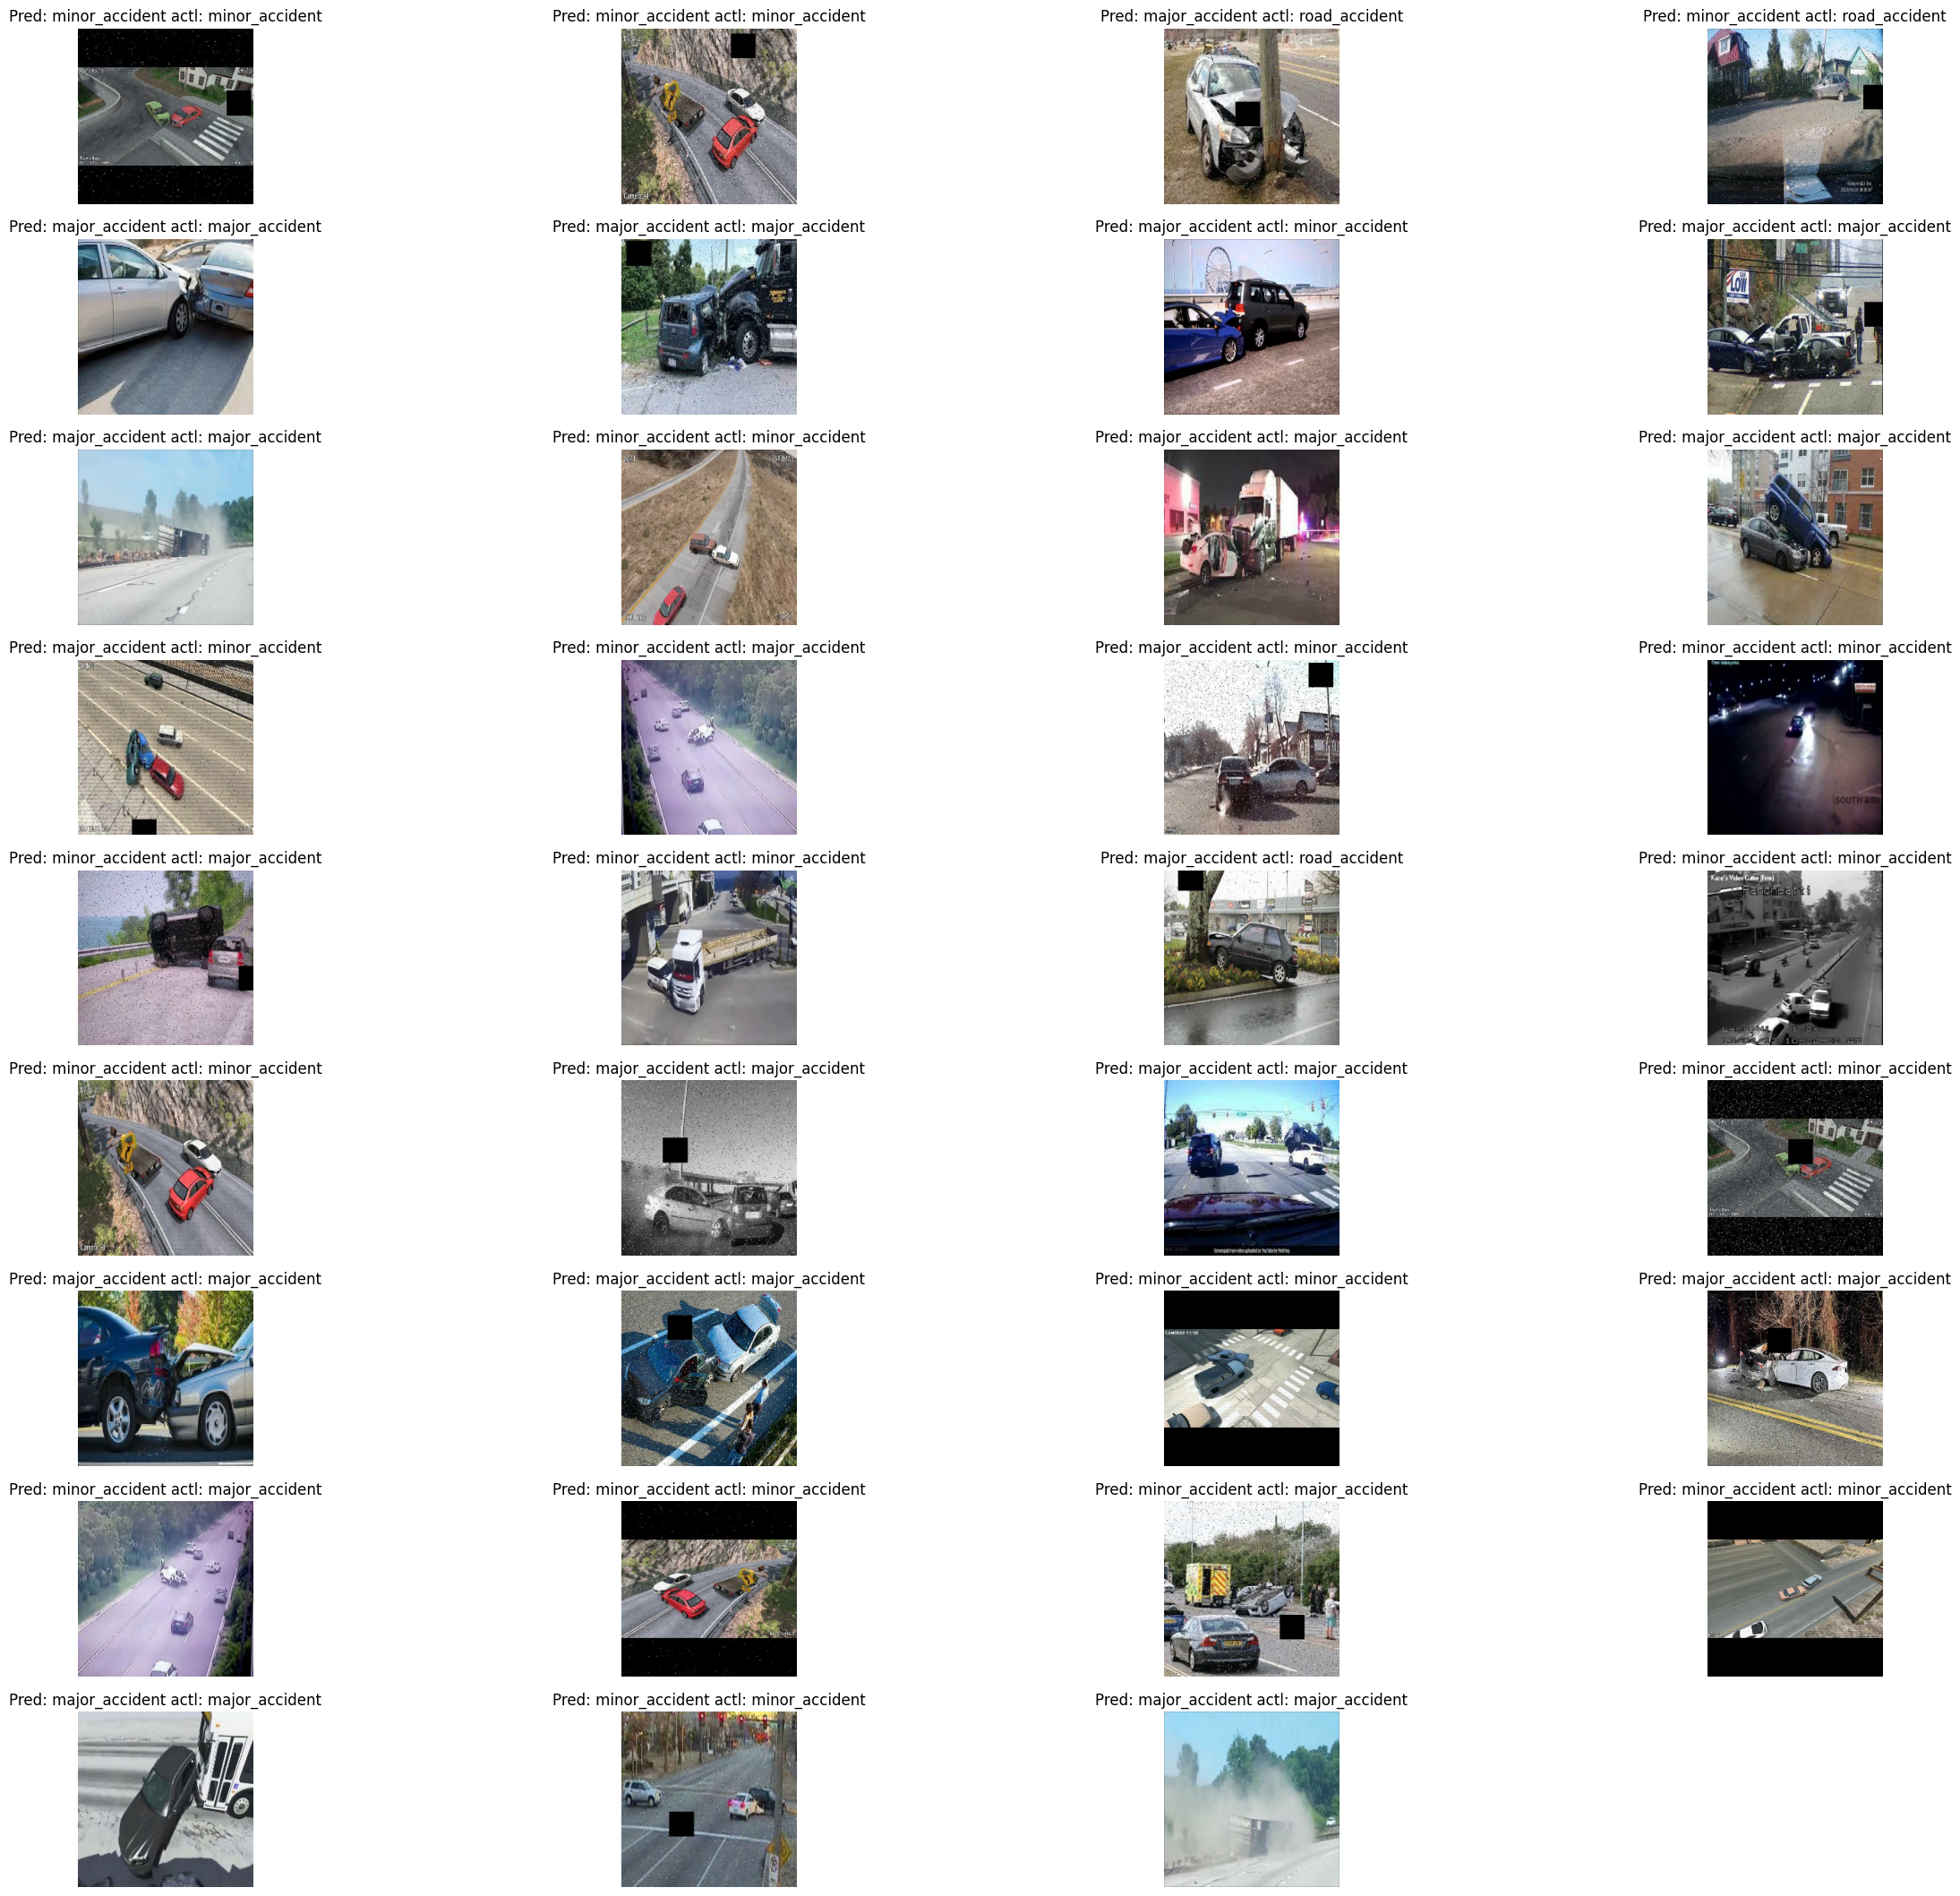

In [59]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    num_images = len(images)  # Dynamically get the number of images in the batch
    for i in range(num_images):  # Adjust loop to match the batch size
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' actl: ' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)


In [60]:

model.save('sehab.keras')

In [36]:

!pip install tensorflow


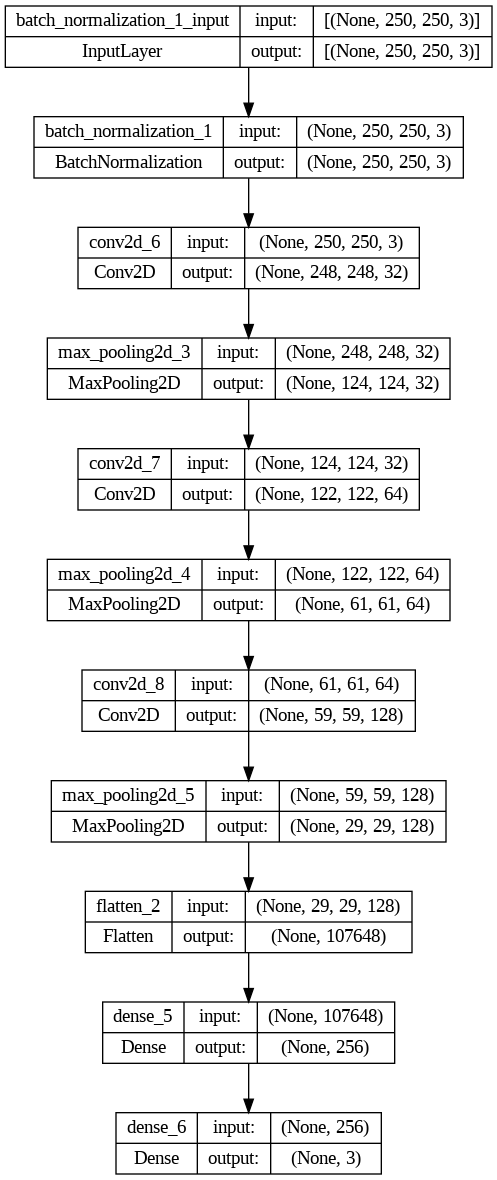

In [61]:
from tensorflow.keras.utils import plot_model


plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
